# Data Collection

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d CooperUnion/anime-recommendations-database

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database
License(s): CC0-1.0
  0% 0.00/25.0M [00:00<?, ?B/s]
100% 25.0M/25.0M [00:00<00:00, 1.17GB/s]


In [7]:
!unzip anime-recommendations-database.zip

Archive:  anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [8]:
anime = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

# Data Understanding

## Data Anime

In [9]:
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [10]:
anime.shape

(12294, 7)

In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [12]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


## Data Rating

In [13]:
ratings.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [14]:
ratings.shape

(7813737, 3)

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [16]:
ratings.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


#Exploratory Data Analysis

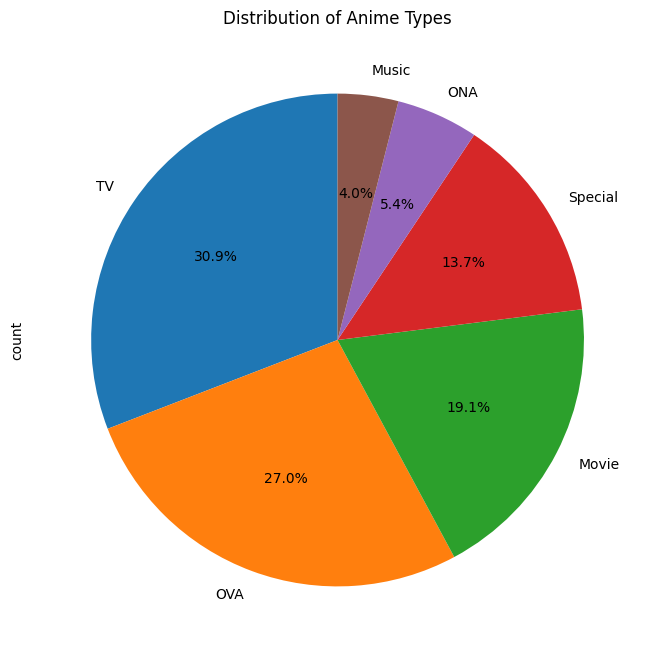

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
anime['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Anime Types')
plt.show()

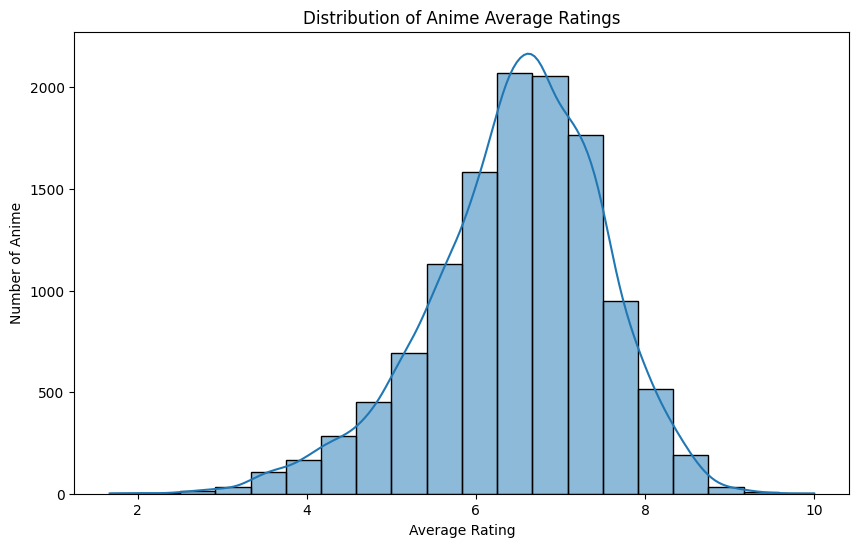

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(anime['rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Anime Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Anime')
plt.show()

<ipython-input-19-7ec361da3841>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='members', y='name', data=top_community_anime, palette='viridis')


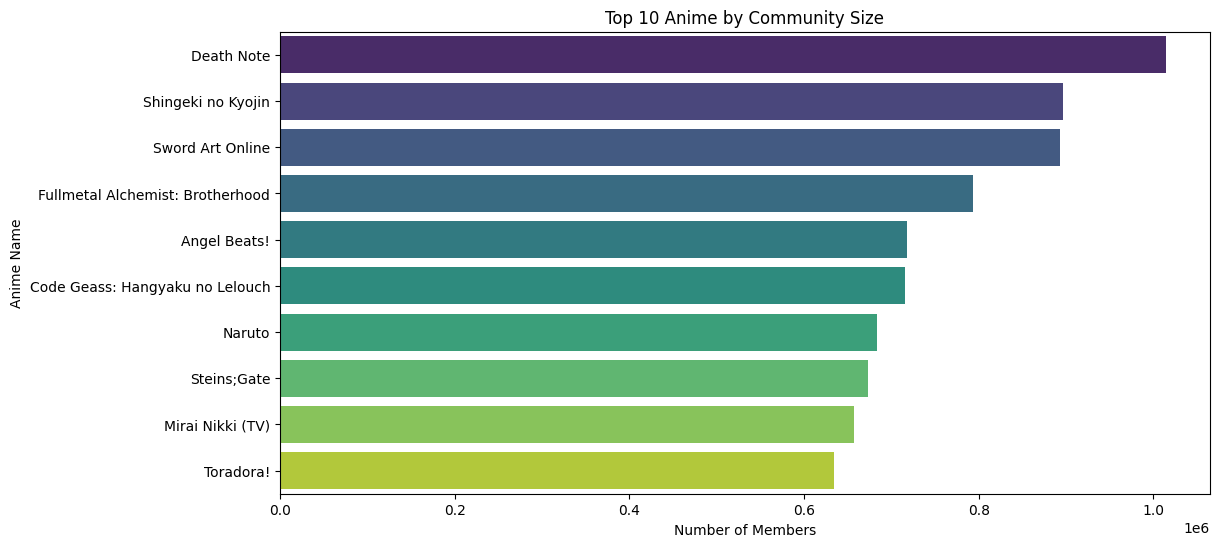

In [19]:
top_community_anime = anime.sort_values(by='members', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='members', y='name', data=top_community_anime, palette='viridis')
plt.title('Top 10 Anime by Community Size')
plt.xlabel('Number of Members')
plt.ylabel('Anime Name')
plt.show()

<ipython-input-20-a232f3cbeb73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top_rated_anime, palette='magma')


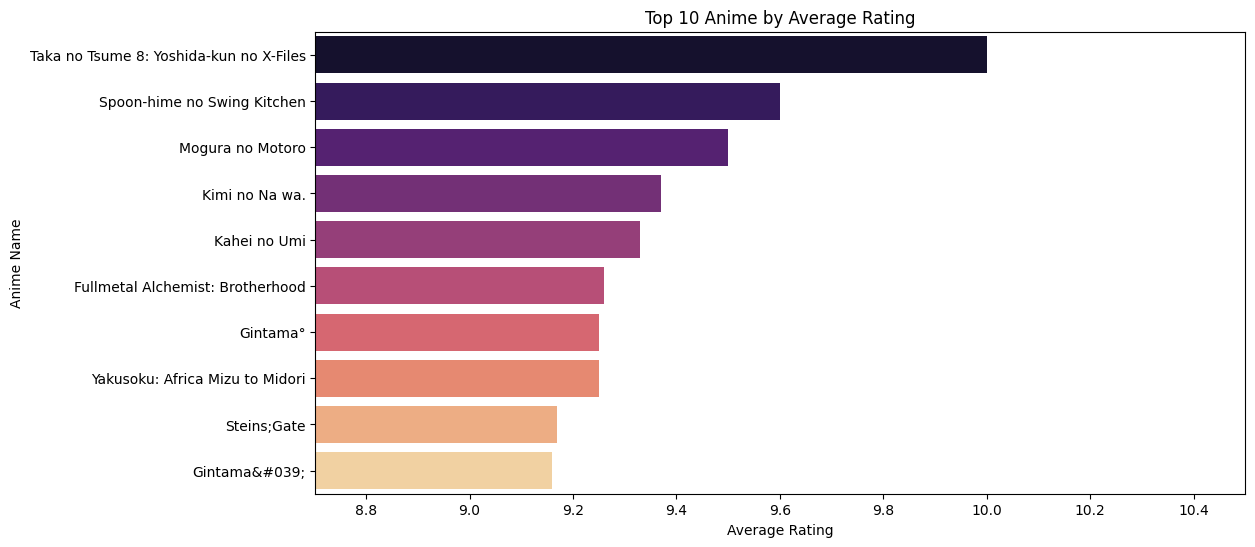

In [20]:
top_rated_anime = anime.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_anime, palette='magma')
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Anime Name')
plt.xlim(top_rated_anime['rating'].min() * 0.95, top_rated_anime['rating'].max() * 1.05) # Adjust x-axis limits for better visualization
plt.show()

# Data Preparation

In [21]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [22]:
anime.dropna(subset=['name'], inplace=True)

In [23]:
anime['genre'] = anime['genre'].fillna('')

In [24]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,0
type,25
episodes,0
rating,230
members,0


In [25]:
ratings.isna().sum()

,0
user_id,0
anime_id,0
rating,0


In [26]:
ratings = ratings[ratings['rating'] != -1]

In [27]:
ratings.head(10)

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


## TF-IDF Vectorization

In [28]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime['genre'])

In [29]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [30]:
indices = pd.Series(anime.index, index=anime['name']).drop_duplicates()

# Model Development Content Based Filtering

In [31]:
def get_content_recommendations(title, top_n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    anime_indices = [i[0] for i in sim_scores]
    return anime[['name', 'genre']].iloc[anime_indices]

In [32]:
print("\nContent-Based Top 10 Recommendations for 'Naruto':")
print(get_content_recommendations("Naruto"))


Content-Based Top 10 Recommendations for 'Naruto':
                                                   name  \
615                                  Naruto: Shippuuden   
841                                              Naruto   
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
1343                                        Naruto x UT   
1472        Naruto: Shippuuden Movie 4 - The Lost Tower   
1573  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
2458               Naruto Shippuuden: Sunny Side Battle   
2997  Naruto Soyokazeden Movie: Naruto to Mashin to ...   
7628                            Kyutai Panic Adventure!   
784          Naruto: Shippuuden Movie 6 - Road to Ninja   

                                                  genre  
615   Action, Comedy, Martial Arts, Shounen, Super P...  
841   Action, Comedy, Martial Arts, Shounen, Super P...  
1103  Action, Comedy, Martial Arts, Shounen, Super P...  
1343  Action, Comedy, Martial Arts, Shounen, Super P...  
1472  Ac

# Model Development Collaborative Filtering (User-Based)

In [33]:
user_anime_matrix = ratings.pivot_table(index='user_id', columns='anime_id', values='rating')

In [34]:
user_anime_matrix_filled = user_anime_matrix.fillna(0)

In [35]:
user_similarity = cosine_similarity(user_anime_matrix_filled)
user_sim_df = pd.DataFrame(user_similarity, index=user_anime_matrix.index, columns=user_anime_matrix.index)

In [36]:
def predict_rating(user_id, anime_id):
    if anime_id not in user_anime_matrix.columns:
        return np.nan
    sim_scores = user_sim_df[user_id]
    ratings_for_anime = user_anime_matrix[anime_id]
    valid = ratings_for_anime[ratings_for_anime.notna()]
    sim_scores = sim_scores[valid.index]
    if sim_scores.sum() == 0:
        return np.nan
    return np.dot(sim_scores, valid) / sim_scores.sum()

In [37]:
def get_top_n_recommendations(user_id, n=10):
    watched = ratings[ratings['user_id'] == user_id]['anime_id']
    anime_ids = user_anime_matrix.columns.difference(watched)
    predictions = [(anime_id, predict_rating(user_id, anime_id)) for anime_id in anime_ids]
    predictions = [p for p in predictions if not np.isnan(p[1])]
    top_n = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]
    anime_names = anime.set_index('anime_id').loc[[i[0] for i in top_n]]['name']
    return anime_names.reset_index(drop=True)

In [38]:
print("\nCollaborative Top 10 Recommendations for User 1:")
print(get_top_n_recommendations(1))


Collaborative Top 10 Recommendations for User 1:
0                        Hamster Club
1                       Play Ball 2nd
2            Live On Cardliver Kakeru
3           Gozonji! Gekkou Kamen-kun
4               Ryoujoku Joshi Gakuen
5      Midoriyama Koukou Koushien-hen
6                      Chargeman Ken!
7                           Nono-chan
8    Asari-chan: Ai no Marchen Shoujo
9                    Seton Doubutsuki
Name: name, dtype: object


# Evaluation Metric

In [39]:
sample_ratings = ratings.sample(1000, random_state=1)
preds = []
actuals = []

In [40]:
for _, row in sample_ratings.iterrows():
    pred = predict_rating(row['user_id'], row['anime_id'])
    if not np.isnan(pred):
        preds.append(pred)
        actuals.append(row['rating'])

rmse = sqrt(mean_squared_error(actuals, preds))
print(f"\nRMSE for Collaborative Filtering on sample: {rmse:.4f}")


RMSE for Collaborative Filtering on sample: 1.3930
